In [1]:
import numpy as np
import pandas as pd
# configure pandas display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# **Load Dataset**
* We will use the Credit Card Fraud Detection dataset

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
df_numerical_features = [col for col in df.columns if df[col].dtype == 'float64']
df_numerical_features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [8]:
# drop the column names which dont make sense
df_numerical_features.remove('Time')

In [9]:
# chaeck after removing the column label
# df_numerical_features

In [10]:
df_numerical_features.remove('Amount')

In [11]:
# check after removing the column label
df_numerical_features

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

In [12]:
# extract the numerical only dataset
df_numerical = df[df_numerical_features]

In [13]:
df_numerical.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [14]:
df_numerical.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
dtype: int64

In [15]:
df_numerical.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [16]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df_numerical)

MinMaxScaler()

In [17]:
# get scaled data
df_scaled = pd.DataFrame(mms.transform(df_numerical))

# assign column labels
df_scaled.columns = df_numerical_features

df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490


In [18]:
df_scaled.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,0.508722,0.285286,0.704193,0.448331,0.646053,0.336327,0.449352,0.731130,0.653292,0.563315,0.580265,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124
std,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,0.022528,0.060698,0.037660,0.077041,0.032231,0.068426,0.027866,0.024678,0.057647,0.063570,0.008208,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,0.497644,0.239943,0.688907,0.398130,0.631744,0.292753,0.434468,0.717074,0.618983,0.527682,0.578011,0.557798,0.484730,0.663030,0.334454,0.560104,0.372036,0.415203,0.312049
50%,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,0.506800,0.283338,0.709471,0.447281,0.647755,0.339921,0.451464,0.729221,0.653042,0.563606,0.579600,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352
75%,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,0.518113,0.329266,0.727494,0.499613,0.662635,0.384831,0.465994,0.742743,0.687736,0.599155,0.581682,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# import PCA from decomposition 
from sklearn.decomposition import PCA

# create the PCA object to use to fit the given data
pca = PCA()

# fit the PCA with the given dataset
pca.fit(df_scaled)

PCA()

In [20]:
# principal axes in feature space, representing the directions of maximum variance in the data.
print(pca.components_)

[[ 1.27478653e-16 -2.28591329e-16  7.18184815e-17  4.08165036e-16
  -8.50777400e-18 -3.22818963e-16  1.28235242e-16  4.25924465e-17
  -1.24572970e-16  2.42663697e-18  2.71761687e-15  8.94860457e-17
  -4.49496241e-15 -1.47375832e-16 -1.62240766e-15 -1.25132724e-16
  -6.39293398e-17  5.00071821e-17 -1.66770101e-16  1.22846754e-17
   2.00837906e-17 -4.24304348e-17  6.47858179e-18  1.00000000e+00
   5.35919747e-16  6.72355620e-15 -3.42261669e-17 -5.63960204e-17]
 [ 3.16107985e-16  5.98461781e-17  1.10301691e-17 -1.20106504e-15
   1.02728372e-16 -9.44265733e-18 -1.73140597e-16 -3.91373639e-17
  -2.45361946e-16 -1.57404987e-16 -1.91441411e-16  2.13881678e-16
   2.96762678e-15  9.30771178e-17  2.08992121e-15 -2.37241636e-16
   1.11245104e-16  1.75196798e-16  1.11829528e-15 -7.73277357e-18
  -8.08632695e-17  4.57327838e-17  1.85394487e-16 -6.71560717e-15
   1.09374327e-15  1.00000000e+00 -1.06578599e-17  4.92932839e-17]
 [ 1.26599490e-16  1.85057348e-16 -1.74820281e-16  1.61315557e-16
   1.889

In [21]:
# check the shape
print(pca.components_.shape)

(28, 28)


In [22]:
# check the type
print(type(pca.components_))

<class 'numpy.ndarray'>


In [23]:
# Percentage of variance explained by each of the selected components
print(pca.explained_variance_)

[6.66029965e-03 6.20484806e-03 5.93531234e-03 4.68214691e-03
 4.04109465e-03 3.93935267e-03 3.68418939e-03 3.32317255e-03
 1.43231515e-03 1.41828199e-03 1.14609111e-03 1.10728004e-03
 1.03886010e-03 8.56185664e-04 7.76527185e-04 6.90351423e-04
 6.09019430e-04 5.07506088e-04 3.03586904e-04 1.79419517e-04
 1.64138535e-04 1.40204945e-04 8.63371166e-05 8.60029082e-05
 6.73784223e-05 5.67989907e-05 5.55045099e-05 4.48686262e-05]


In [24]:
print(len(pca.explained_variance_))

28


In [25]:
print(pca.singular_values_)

[43.55333858 42.03781581 41.11462717 36.51716763 33.92532979 33.49554113
 32.39258006 30.7645816  20.19732529 20.09813972 18.06692074 17.75837825
 17.20097639 15.61559522 14.87143575 14.02199085 13.17013242 12.02251134
  9.29856827  7.14840926  6.83722456  6.31911461  4.95876283  4.94915592
  4.38061399  4.02202603  3.97592976  3.57475229]


In [26]:
print(pca.mean_)

[0.95829378 0.76725837 0.83741363 0.2519302  0.7657163  0.26301976
 0.26535552 0.78538548 0.46277991 0.50872198 0.28528563 0.70419265
 0.4483309  0.64605314 0.33632729 0.44935188 0.73112974 0.65329207
 0.56331483 0.58026532 0.5614795  0.510031   0.66543361 0.38223415
 0.57790656 0.42544834 0.41651095 0.31312386]


In [27]:
principal_components = pca.fit_transform(df_scaled)

print(type(principal_components))
print(principal_components.shape)

principal_components_df = pd.DataFrame(principal_components)

<class 'numpy.ndarray'>
(284807, 28)


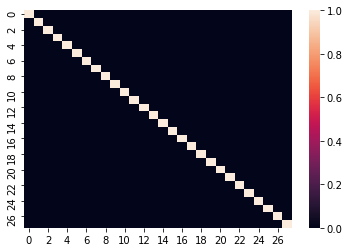

In [28]:
import seaborn as sns 
sns.heatmap(principal_components_df.corr());

Text(0, 0.5, 'Cumulative Explained Variance')

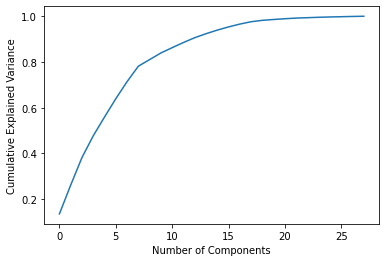

In [29]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [30]:
pca_low_dim = PCA(n_components = 20)
pca_low_dim.fit(df_scaled)

PCA(n_components=20)

In [31]:
# original components
print(df_scaled.shape)

(284807, 28)


In [32]:
# transformed componenets
print(pca_low_dim.transform(df_scaled).shape)

(284807, 20)


In [33]:
print(pca_low_dim.explained_variance_)

[0.0066603  0.00620485 0.00593531 0.00468215 0.00404109 0.00393935
 0.00368419 0.00332317 0.00143232 0.00141828 0.00114609 0.00110728
 0.00103886 0.00085619 0.00077653 0.00069035 0.00060902 0.00050751
 0.00030359 0.00017942]


In [34]:
print(pca_low_dim.explained_variance_.sum())

0.04853584080787096
